In [1]:
from deck import BlackjackShoe
from dealer import Dealer
from round import BlackjackRound
from hand import Hand
from game import Game, BLACKJACKSIXTOFIVEPAYOUT, BLACKJACKTHREETOTWOPAYOUT
from strategies.strategy import StrategyTable
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
rounds = []
rounds_count_dict = {}
games = []
num_players = 1
num_games = 1
bet_size = 100
num_rounds = 10000000
for _ in range(num_games):
    game = Game(6, num_players=num_players, strategy=StrategyTable["MULTIDECK"], hit_on_soft_17=True, blackjack_payout=BLACKJACKTHREETOTWOPAYOUT, min_bet=bet_size, denominations=100, player_bankroll=0, resplit_till=4)
    round_data, round_count_data = game.play(num_rounds, print_cards=False, print_round_results=False)
    rounds.extend(round_data)
    rounds_count_dict = round_count_data
    games.append(game.house_bankroll)

profit_sum = 0
wins = 0
losses = 0
pushes = 0
for g in rounds:
    # print(rounds_count)
    if g > 0:
        wins += 1
    elif g < 0:
        losses += 1
    else:
        pushes += 1
    profit_sum += g
print(profit_sum)

print(profit_sum / num_players / num_games / num_rounds)
print(f"Wins: {wins / num_rounds}, Losses: {losses / num_rounds}, Pushes: {pushes / num_rounds}")
print()

=== Results After 10000000 Games ===
Player 0: $-3902700.0
House Bankroll: $3902700.0
Cards Left: 121
Decks Left: 2.5
3902700.0
0.39027
Wins: 0.4781019, Losses: 0.4335058, Pushes: 0.0883923



In [ ]:
## Visualizes the distribution of the profits

rounds_count_edge_dict = {}
for count, round_profits in rounds_count_dict.items():
    num_rounds = len(round_profits)
    num_players = 1
    num_games = 1
    profits = sum(round_profits)
    rounds_count_edge_dict[(count, num_rounds)] = profits / num_rounds / num_players / num_games

for count, edge in sorted(rounds_count_edge_dict.items()):
    print(f"Count: {count}, Edge: {edge}")

Count: (-24, 1), Edge: 100.0
Count: (-23, 2), Edge: 0.0
Count: (-22, 4), Edge: 75.0
Count: (-20, 3), Edge: 100.0
Count: (-19, 18), Edge: 11.11111111111111
Count: (-18, 28), Edge: 46.42857142857143
Count: (-17, 61), Edge: 40.98360655737705
Count: (-16, 82), Edge: 5.487804878048781
Count: (-15, 271), Edge: -3.690036900369004
Count: (-14, 426), Edge: 7.276995305164319
Count: (-13, 1172), Edge: 13.993174061433447
Count: (-12, 1893), Edge: 7.659799260433175
Count: (-11, 3935), Edge: 6.810673443456163
Count: (-10, 8360), Edge: 9.623205741626794
Count: (-9, 13079), Edge: 5.975227463873384
Count: (-8, 30883), Edge: 5.43664799404203
Count: (-7, 40930), Edge: 4.17297825555827
Count: (-6, 103591), Edge: 3.7971445395835546
Count: (-5, 135214), Edge: 3.308089399026728
Count: (-4, 320872), Edge: 2.2046174175372113
Count: (-3, 443500), Edge: 1.548816234498309
Count: (-2, 999536), Edge: 1.4281626674777097
Count: (-1, 1556943), Edge: 0.8295101362092254
Count: (0, 2836574), Edge: 0.3948953914123164
Coun

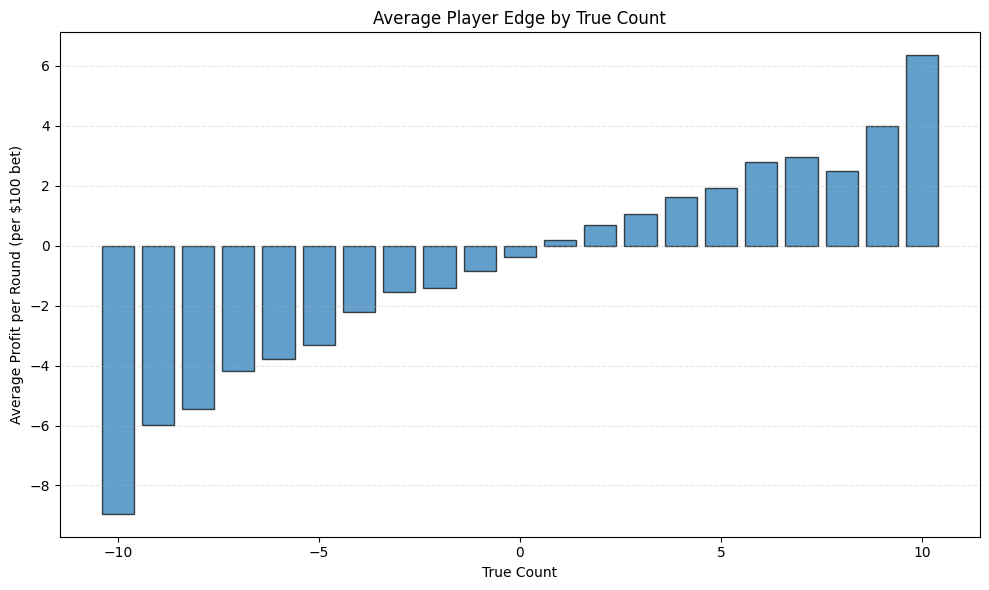

-0.39027


In [17]:
aggregated = {}
for count, profits in rounds_count_dict.items():
    if count >= 10:
        key = 10
    elif count <= -10:
        key = -10
    else:
        key = count
    aggregated.setdefault(key, []).extend(profits)

counts = sorted(aggregated.keys())
avg_edges = [-sum(aggregated[c]) / len(aggregated[c]) for c in counts] ## house edge to player edge

plt.figure(figsize=(10, 6))
plt.bar(counts, avg_edges, edgecolor='black', alpha=0.7)

plt.xlabel('True Count')
plt.ylabel('Average Profit per Round (per $100 bet)')
plt.title('Average Player Edge by True Count')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

total_overall_edge = -(
    sum(sum(v) for v in aggregated.values()) 
    / sum(len(v) for v in aggregated.values())
)
print(total_overall_edge)

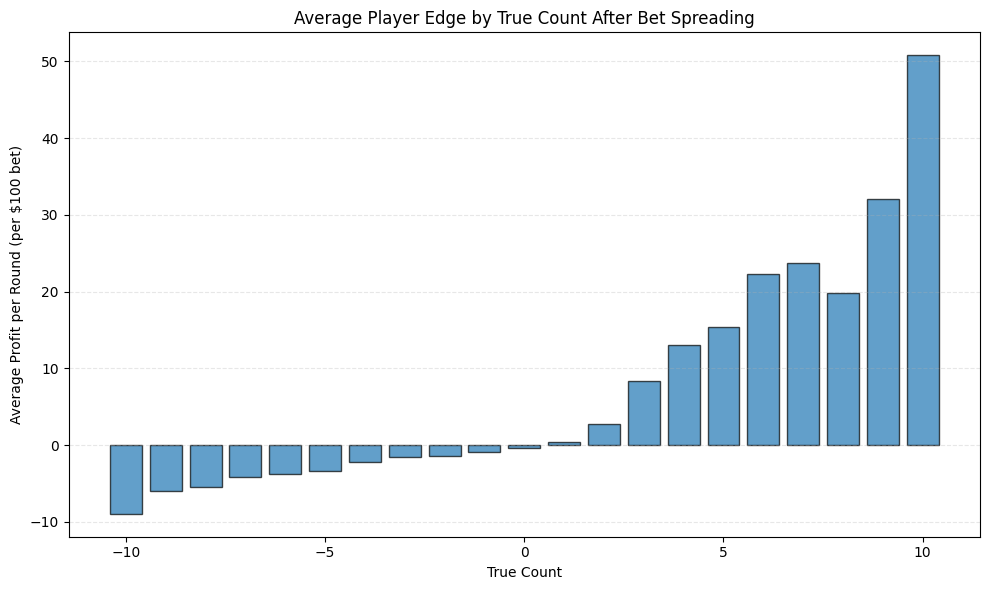

In [18]:
counts = sorted(aggregated.keys())
avg_edges = [-sum(aggregated[c]) / len(aggregated[c]) if c <= 0 else -sum(aggregated[c]) / len(aggregated[c]) * 2**min(c, 3) for c in counts] ## house edge to player edge

plt.figure(figsize=(10, 6))
plt.bar(counts, avg_edges, edgecolor='black', alpha=0.7)

plt.xlabel('True Count')
plt.ylabel('Average Profit per Round (per $100 bet)')
plt.title('Average Player Edge by True Count After Bet Spreading')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


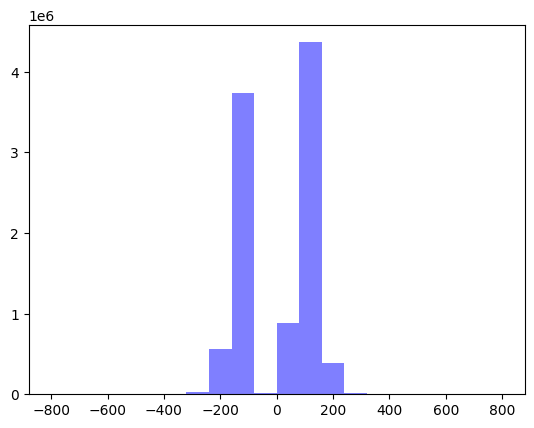

In [19]:
plt.hist(rounds, bins=20, facecolor="blue", alpha=0.5)

plt.show()

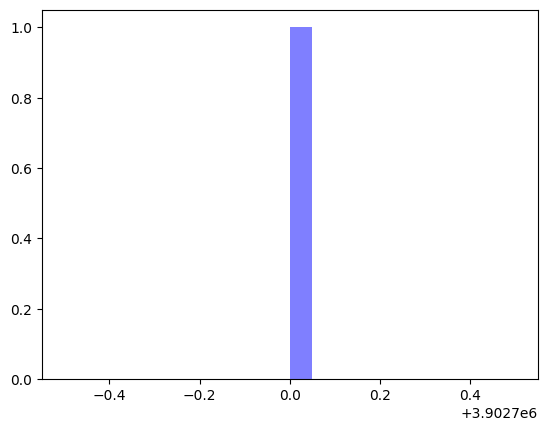

In [21]:
plt.hist(games, bins=20, facecolor="blue", alpha=0.5)
# sns.kdeplot(games)

plt.show()

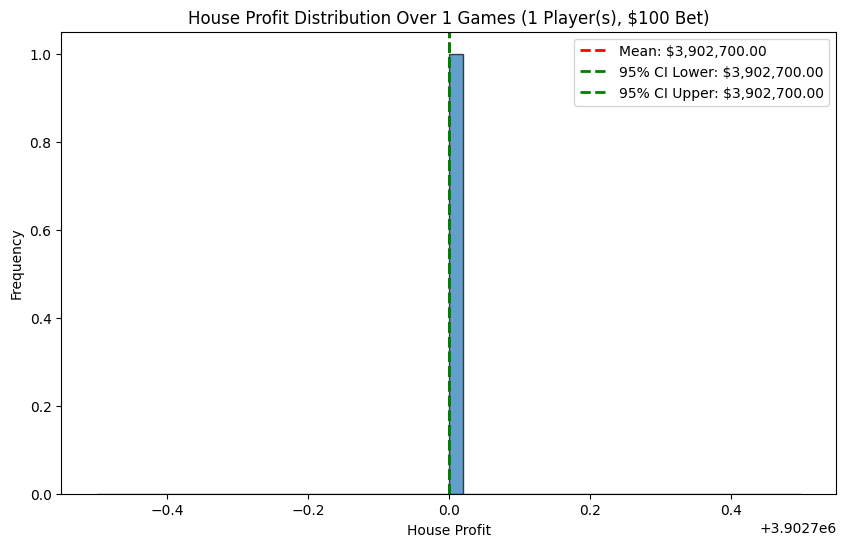

Expected House Profit: $3,902,700.00
95% Confidence Interval: ($3,902,700.00, $3,902,700.00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert house bankroll changes (games list) into profits per game
house_profits = np.array(games)  # Assuming games stores house profit for each game

# Calculate statistics
mean_house_profit = np.mean(house_profits)
ci_lower = np.percentile(house_profits, 2.5)
ci_upper = np.percentile(house_profits, 97.5)

# Plot histogram of actual house profits
plt.figure(figsize=(10, 6))
plt.hist(house_profits, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(mean_house_profit, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_house_profit:,.2f}')
plt.axvline(ci_lower, color='green', linestyle='dashed', linewidth=2, label=f'95% CI Lower: ${ci_lower:,.2f}')
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label=f'95% CI Upper: ${ci_upper:,.2f}')
plt.title(f'House Profit Distribution Over {num_games} Games ({num_players} Player(s), ${bet_size} Bet)')
plt.xlabel('House Profit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Expected House Profit: ${mean_house_profit:,.2f}")
print(f"95% Confidence Interval: (${ci_lower:,.2f}, ${ci_upper:,.2f})")


In [ ]:
import numpy as np

# Example: house_wins is an array of house profit per round from your simulation.
# For illustration, let's assume you already simulated these values.
# house_wins = np.array([...])
house_wins = np.array(rounds)
n = len(house_wins)
sample_mean = np.mean(house_wins)
sample_std = np.std(house_wins, ddof=1)


In [ ]:
from scipy import stats

# Hypothesized mean (e.g., house edge is $2.50 per round)
mu0 = 0.41349 * 1

# Calculate the t statistic
t_statistic = (sample_mean - mu0) / (sample_std / np.sqrt(n))

# Degrees of freedom is n-1
df = n - 1

# Two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))

print(f"Sample Mean: {sample_mean:.4f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
